In [18]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import math

riverstation_id = 1
all_levels = pd.read_csv('./csv/rivers.csv')
river = all_levels[all_levels['riverstation_id'] == riverstation_id]['level'].values

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [40]:
def train_test_split(dataset, train_frac):
    train_size = int(len(dataset)*train_frac)
    return dataset[:train_size, :], dataset[train_size: ,:]

def create_datasets(dataset, look_back=1, look_ahead=1):
    data_x, data_y = [], []
    for i in range(len(dataset)-look_back-look_ahead+1):
        window = dataset[i:(i+look_back), 0]
        data_x.append(window)
        data_y.append(dataset[i + look_back + look_ahead -1, 0])
    return np.array(data_x), np.array(data_y)

def reverse_scale(data, mean, std):
    for x in np.nditer(data, op_flags=['readwrite']):
        x[...] = x*std + mean
    return data

def mean_absolute_percentage(y, y_pred):
    return np.mean(np.abs((y - y_pred) / y)) * 100

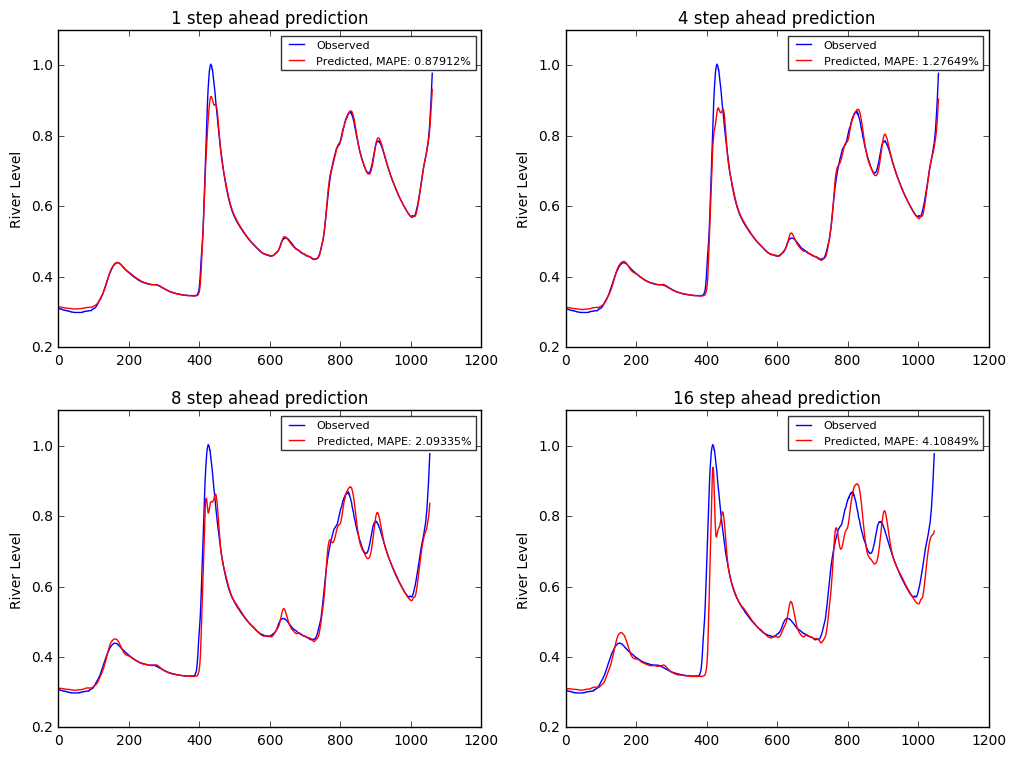

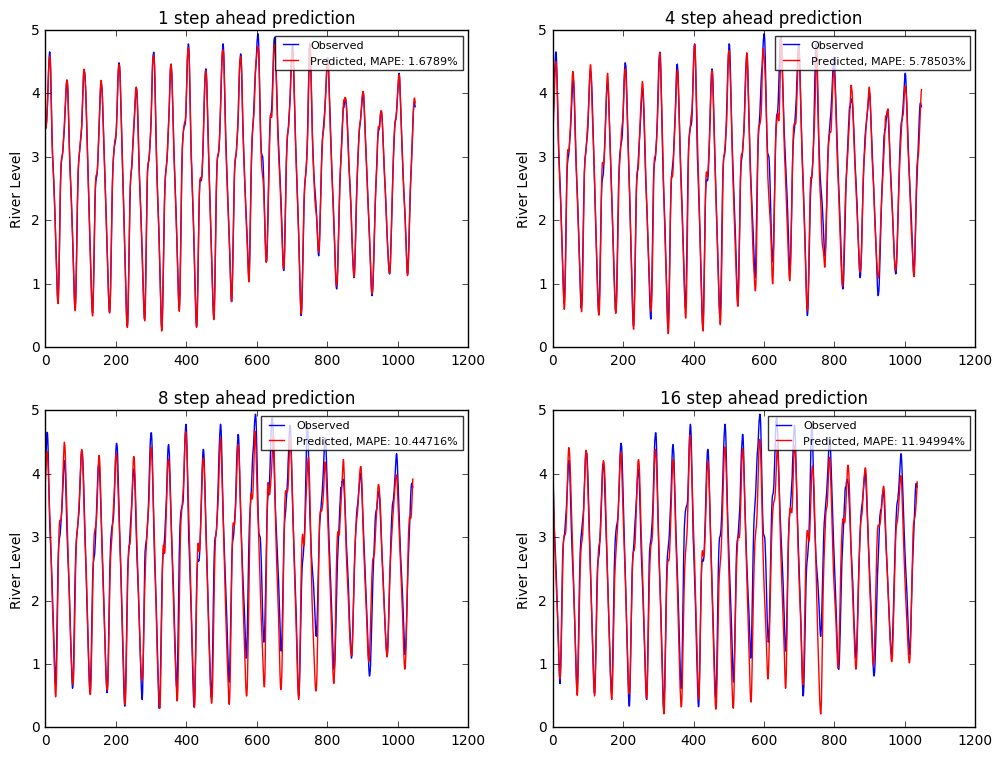

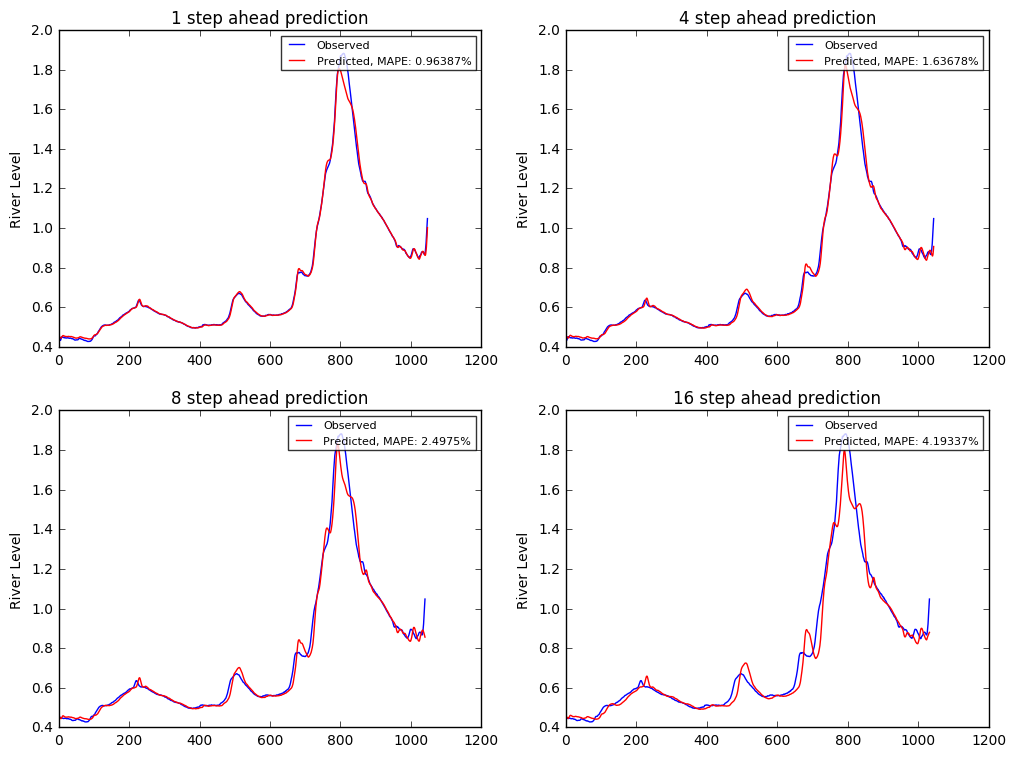

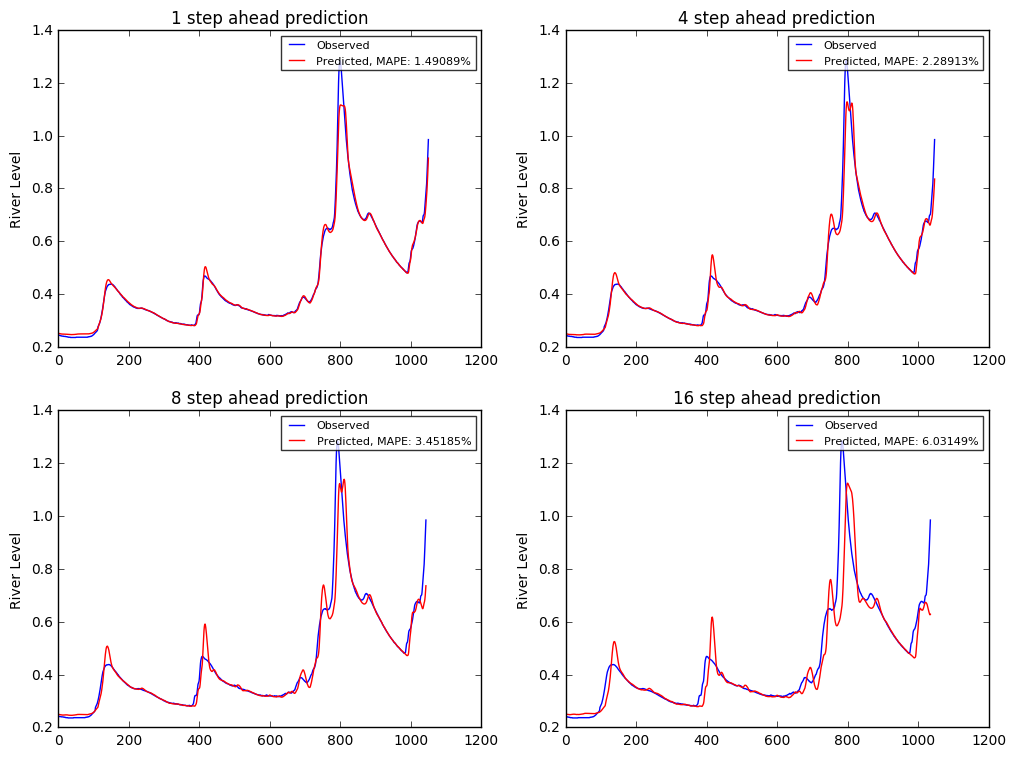

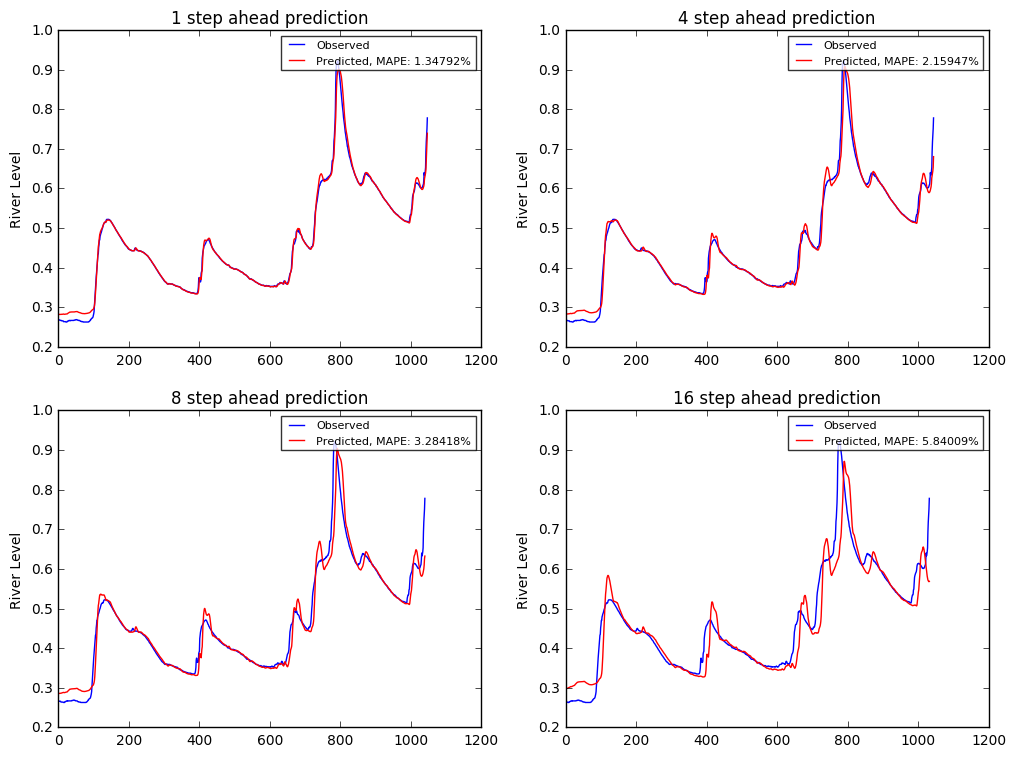

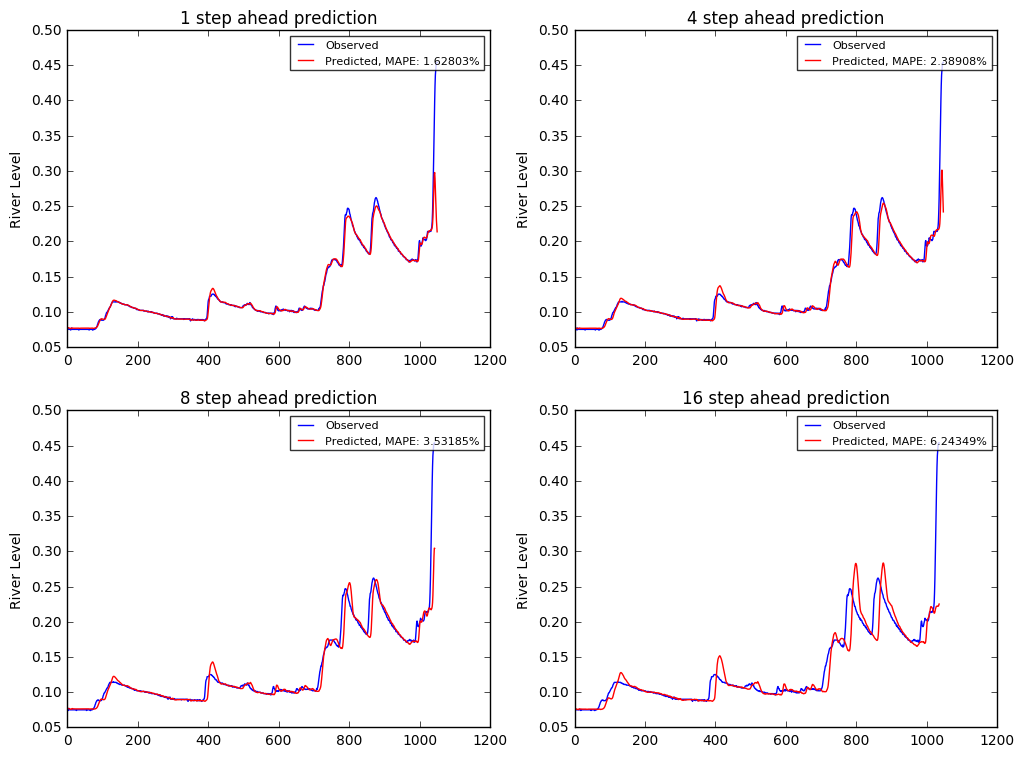

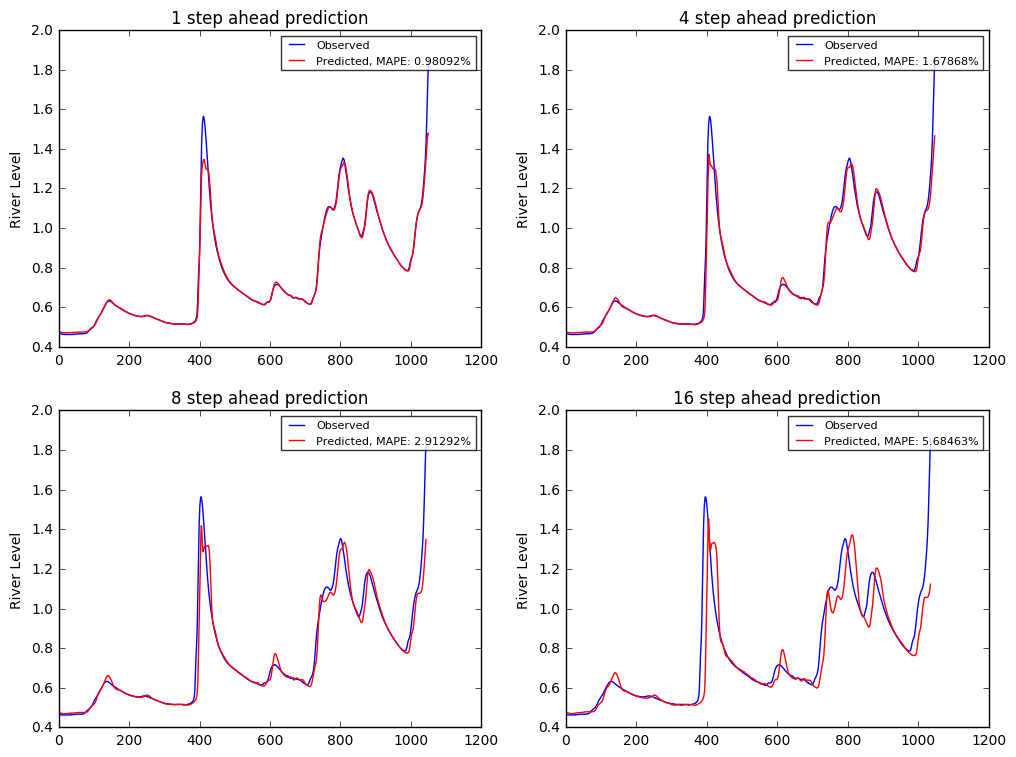

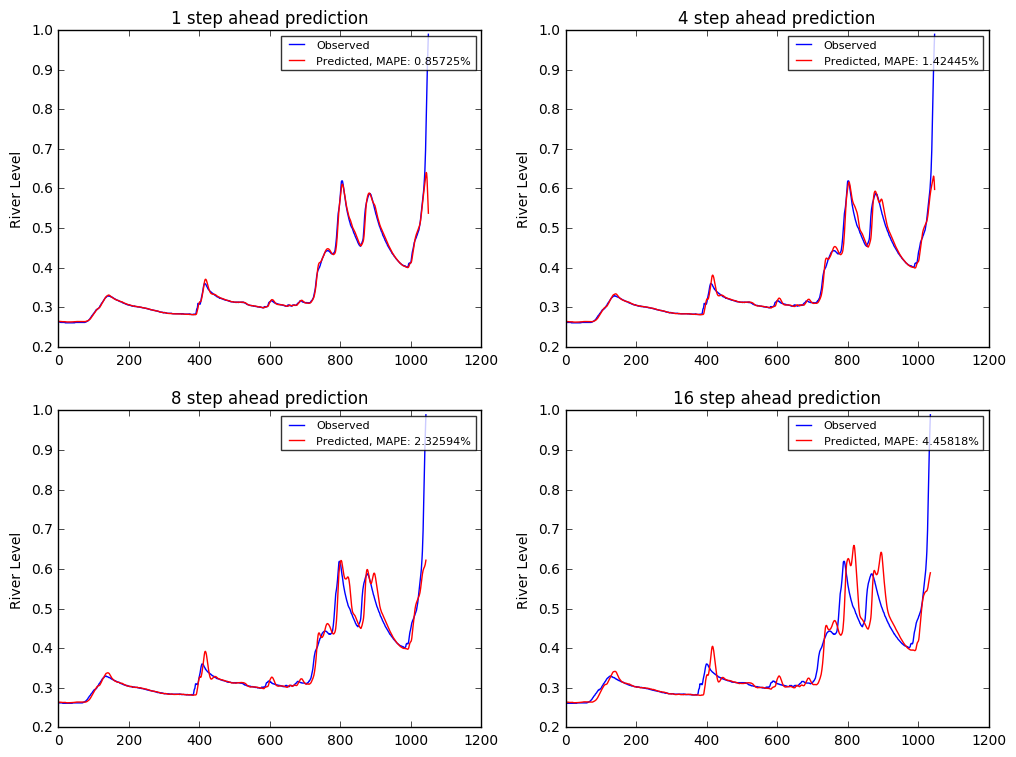

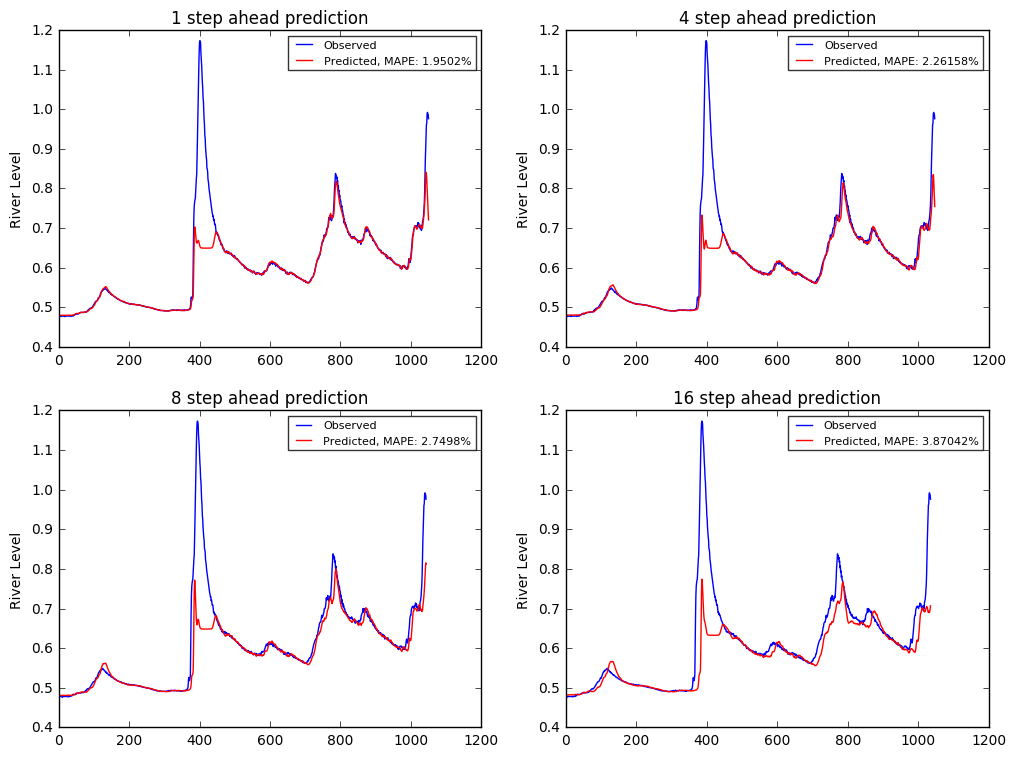

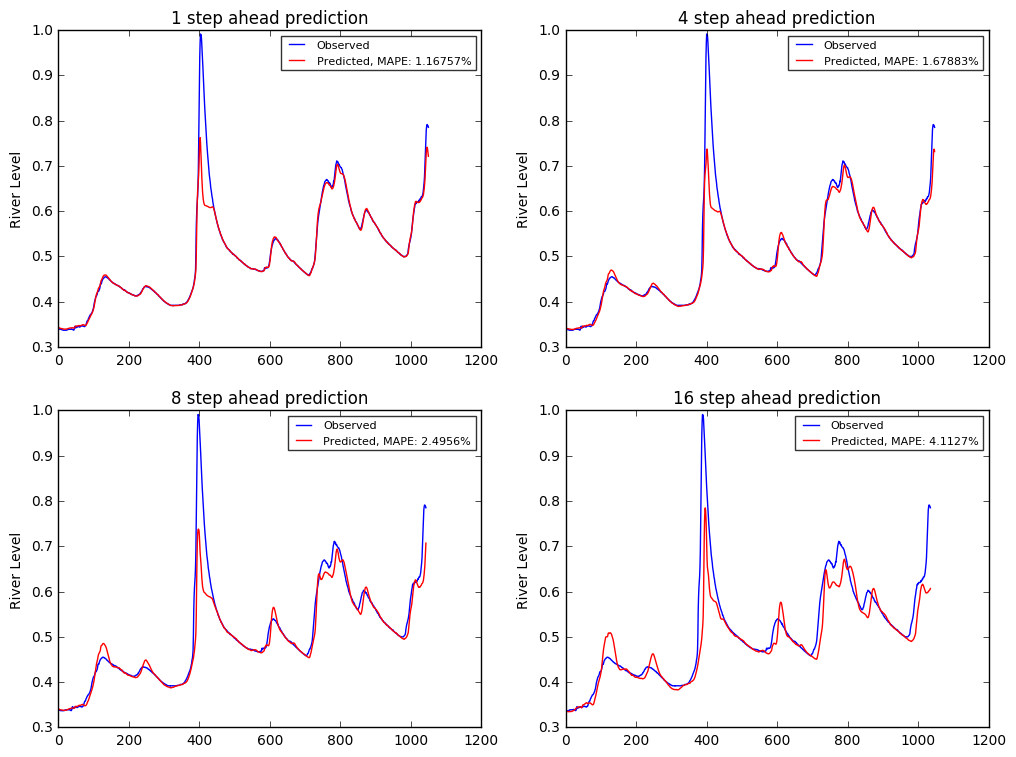

[[0.87912079253459829, 0.98562265847232466, 1.1239085805439613, 1.2764850680775848, 1.4623653691538376, 1.6612286391747291, 1.8766591190030431, 2.0933521837653539, 2.330376568614454, 2.5773600775882337, 2.824064287588592, 3.0849591922342685, 3.3333070875321793, 3.5627368584251649, 3.835253746717314, 4.1084876910438588, 4.3704493217690192, 4.6395328170566446, 4.9089593135552851, 5.1846026466021105], [1.67889824477091, 2.9543522406628715, 4.3787053235386102, 5.7850268838257213, 7.1153736455699095, 8.4339405383609378, 9.6339443990294225, 10.447163388918252, 11.082169068400148, 11.443631286892781, 11.583609739435786, 11.710242153165193, 11.689257493444275, 11.650094454604814, 11.855364976831071, 11.949943593026466, 12.022959086188109, 12.219123515644624, 12.386375743430781, 12.425162771600871], [0.96386643949638462, 1.1702142817192331, 1.4040910722529922, 1.636776923990432, 1.8700365123233853, 2.0810924130493964, 2.2973186328269741, 2.4975018633210553, 2.7171773943028641, 2.940395031187481

In [90]:
split = 0.7
look_back = 32
results = []
for i in range(1, 11):
    river_results = []
    for j in range(1, 21):
        look_ahead = j
        riverstation_id = i
        
        river = all_levels[all_levels['riverstation_id'] == riverstation_id]['level'].values
        river = river.reshape(len(river), 1)

        #standardize data
        river_mean, river_std = river.mean(), river.std()
        river = preprocessing.scale(river).reshape(len(river), 1)

        train, test = train_test_split(river, split)
        train_x, train_y = create_datasets(train, look_back, look_ahead)
        test_x, test_y = create_datasets(test, look_back, look_ahead)
        clf = SVR(C=1.0, epsilon=0.01)
        clf.fit(train_x, train_y) 
        pred_train = clf.predict(train_x)
        pred_test = clf.predict(test_x)

        #reverse scale
        pred_train = reverse_scale(pred_train, river_mean, river_std)
        pred_test = reverse_scale(pred_test, river_mean, river_std)
        test_y = reverse_scale(test_y, river_mean, river_std)
        train_y = reverse_scale(train_y, river_mean, river_std)

        score = mean_absolute_percentage(test_y, pred_test)
        river_results.append(score)
        
        if(j == 1):
            plt.subplot(221)
            plt.plot(test_y, label="Observed")
            plt.plot(pred_test, color="red", label="Predicted, MAPE: "+ str(round(score, 5))+"%")
            plt.title("1 step ahead prediction")
            plt.ylabel("River Level")
            plt.legend(loc=1, fontsize = 8, framealpha=0.8)
            
            
        if(j == 4):
            plt.subplot(222)
            plt.plot(test_y, label="Observed")
            plt.plot(pred_test, color="red", label="Predicted, MAPE: "+ str(round(score, 5))+"%")
            plt.title("4 step ahead prediction")
            plt.ylabel("River Level")
            plt.legend(loc=1, fontsize = 8, framealpha=0.8)
            
            
        if(j == 8):
            plt.subplot(223)
            plt.plot(test_y, label="Observed")
            plt.plot(pred_test, color="red", label="Predicted, MAPE: "+ str(round(score, 5))+"%")
            plt.title("8 step ahead prediction")
            plt.ylabel("River Level")
            plt.legend(loc=1, fontsize = 8, framealpha=0.8)
            
            
        if(j == 16):
            plt.subplot(224)
            plt.plot(test_y, label="Observed")
            plt.plot(pred_test, color="red", label="Predicted, MAPE: "+ str(round(score, 5))+"%")
            plt.title("16 step ahead prediction")
            plt.legend(loc=1, fontsize = 8, framealpha=0.8)
            plt.ylabel("River Level")
            plt.show()
            
    results.append(river_results)
    
print results

In [109]:
averages = []
for i in range(20):
    sum = 0
    for r in results:
        sum+=r[i]
    averages.append(sum/10)
    print i+1, " & ",round(sum/10, 3), "\% \\\\"
    print '\hline'
    


1  &  1.294 \% \\
\hline
2  &  1.591 \% \\
\hline
3  &  1.916 \% \\
\hline
4  &  2.258 \% \\
\hline
5  &  2.593 \% \\
\hline
6  &  2.939 \% \\
\hline
7  &  3.276 \% \\
\hline
8  &  3.579 \% \\
\hline
9  &  3.88 \% \\
\hline
10  &  4.15 \% \\
\hline
11  &  4.406 \% \\
\hline
12  &  4.655 \% \\
\hline
13  &  4.897 \% \\
\hline
14  &  5.134 \% \\
\hline
15  &  5.396 \% \\
\hline
16  &  5.649 \% \\
\hline
17  &  5.905 \% \\
\hline
18  &  6.155 \% \\
\hline
19  &  6.412 \% \\
\hline
20  &  6.653 \% \\
\hline


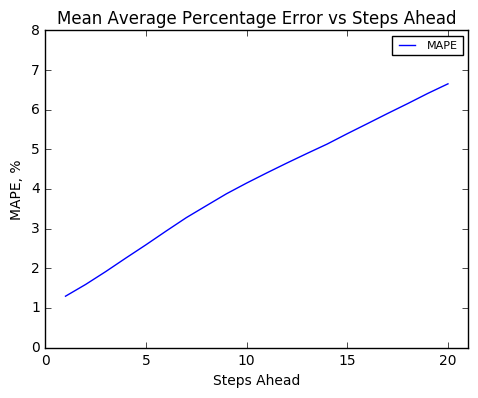

In [108]:
plt.subplot(221)
plt.plot(range(1,21),averages, label="MAPE")
plt.title("Mean Average Percentage Error vs Steps Ahead")
plt.ylabel("MAPE, %")
plt.xlabel("Steps Ahead")
plt.legend(loc=1, fontsize=8)
plt.ylim([0,8])
plt.xlim([0, 21])
plt.show()

In [110]:
for i in range(20):
    print "\hline"
    print i+1, " & ",
    for r in results[:-1]:
        print round(r[i],3), "\% & ",
    print round(results[-1][i],3), "\%",
    print "\\\\"
    
print "\hline"

\hline
1  &  0.879 \% &  1.679 \% &  0.964 \% &  1.491 \% &  1.348 \% &  1.628 \% &  0.981 \% &  0.857 \% &  1.95 \% &  1.168 \% \\
\hline
2  &  0.986 \% &  2.954 \% &  1.17 \% &  1.736 \% &  1.602 \% &  1.872 \% &  1.176 \% &  1.032 \% &  2.051 \% &  1.331 \% \\
\hline
3  &  1.124 \% &  4.379 \% &  1.404 \% &  2.019 \% &  1.856 \% &  2.107 \% &  1.404 \% &  1.22 \% &  2.148 \% &  1.501 \% \\
\hline
4  &  1.276 \% &  5.785 \% &  1.637 \% &  2.289 \% &  2.159 \% &  2.389 \% &  1.679 \% &  1.424 \% &  2.262 \% &  1.679 \% \\
\hline
5  &  1.462 \% &  7.115 \% &  1.87 \% &  2.59 \% &  2.415 \% &  2.632 \% &  1.954 \% &  1.638 \% &  2.369 \% &  1.88 \% \\
\hline
6  &  1.661 \% &  8.434 \% &  2.081 \% &  2.893 \% &  2.696 \% &  2.901 \% &  2.273 \% &  1.859 \% &  2.507 \% &  2.08 \% \\
\hline
7  &  1.877 \% &  9.634 \% &  2.297 \% &  3.177 \% &  2.977 \% &  3.206 \% &  2.59 \% &  2.085 \% &  2.627 \% &  2.292 \% \\
\hline
8  &  2.093 \% &  10.447 \% &  2.498 \% &  3.452 \% &  3.284 \% &  3.5